In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.neighbors import NearestNeighbors


In [23]:
# Carregamento dos Dados
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

In [24]:
# Pré-processamento básico
# Renomear colunas para facilitar a leitura
movies.columns = ['movieId', 'title', 'genres']
ratings.columns = ['userId', 'movieId', 'rating', 'timestamp']

In [25]:
# Merge dos dois datasets para análise unificada
df = pd.merge(ratings, movies, on='movieId')

In [26]:
#Head para analisar as primrias (5 linhas) e colunas
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


EDA - Explorando os dados

In [27]:
print("🔍 Informações gerais:")
print(df.info())

print(f"\n👤 Usuários únicos: {df['userId'].nunique()}")
print(f"🎬 Filmes únicos: {df['movieId'].nunique()}")
print(f"📝 Total de avaliações: {df.shape[0]}")


🔍 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
None

👤 Usuários únicos: 610
🎬 Filmes únicos: 9724
📝 Total de avaliações: 100836


In [28]:
# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

<ipython-input-29-511c47e2c9cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


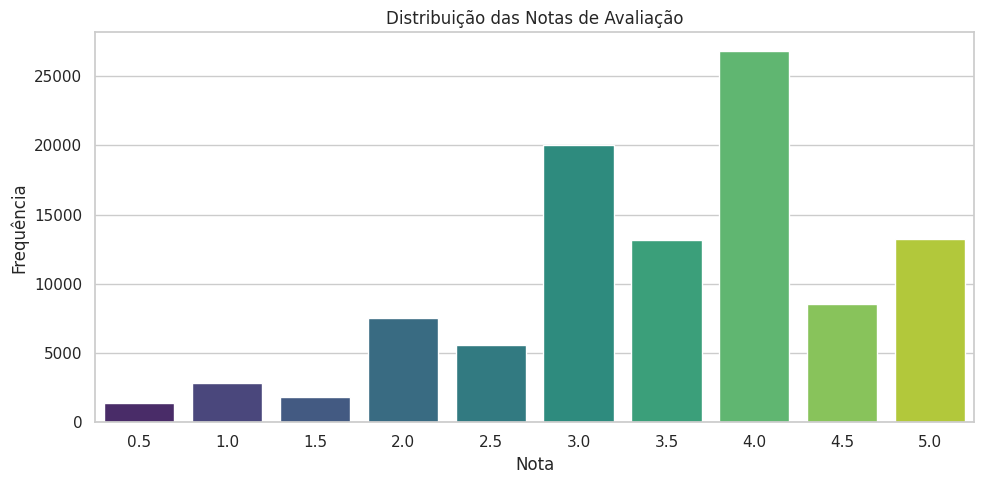

In [29]:
# Distribuição de Notas
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribuição das Notas de Avaliação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

<ipython-input-30-79704faec3cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_filmes.values, y=top_filmes.index, palette='rocket')


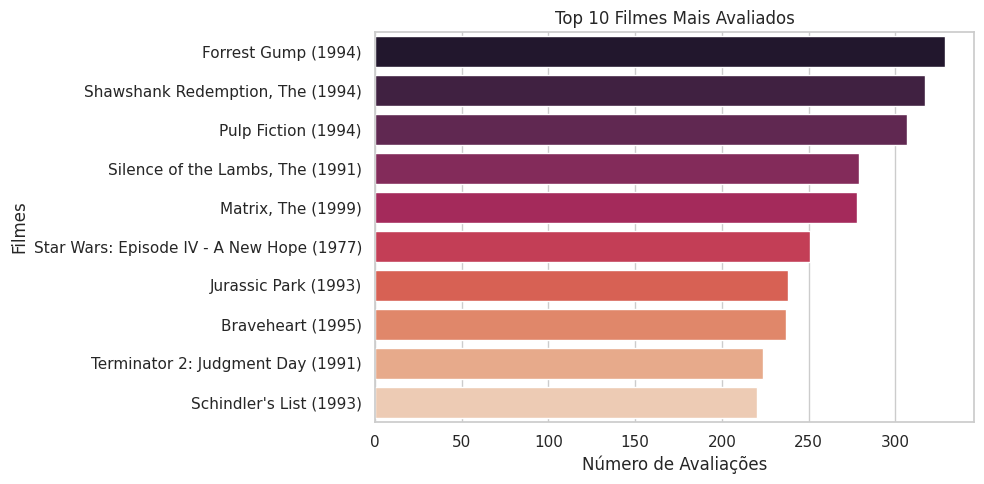

In [30]:
# Top 10 Filmes Mais Avaliados
top_filmes = df['title'].value_counts().head(10)
sns.barplot(x=top_filmes.values, y=top_filmes.index, palette='rocket')
plt.title('Top 10 Filmes Mais Avaliados')
plt.xlabel('Número de Avaliações')
plt.ylabel('Filmes')
plt.tight_layout()
plt.show()


<ipython-input-31-edd3a0dfe637>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_generos, x='Frequência', y='Gênero', palette='magma')


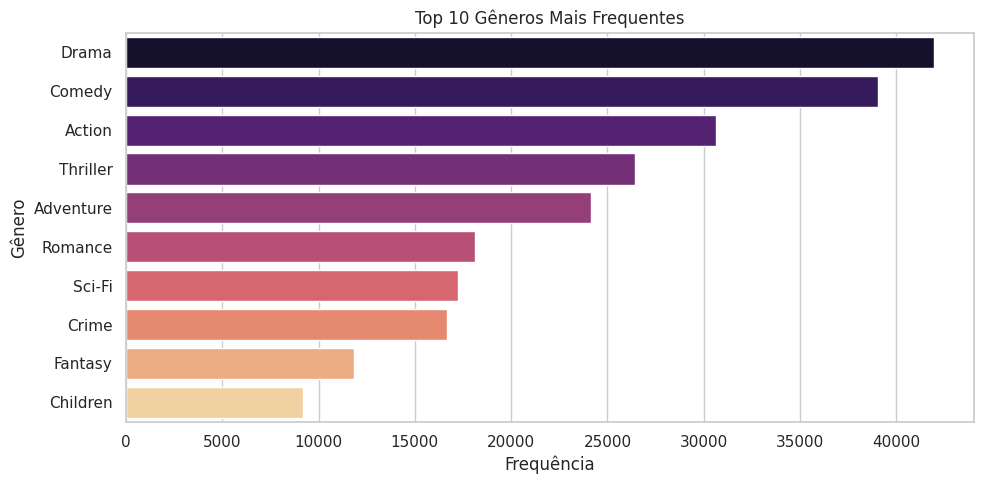

In [31]:
# Gêneros Mais Comuns
generos_expandidos = '|'.join(df['genres']).split('|')
generos_contagem = Counter(generos_expandidos)
top_generos = pd.DataFrame(generos_contagem.most_common(10), columns=['Gênero', 'Frequência'])

sns.barplot(data=top_generos, x='Frequência', y='Gênero', palette='magma')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

<ipython-input-34-b435b2a49148>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacoes_por_usuario.index.astype(str), y=avaliacoes_por_usuario.values, palette="Blues_r")
<ipython-input-34-b435b2a49148>:9: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


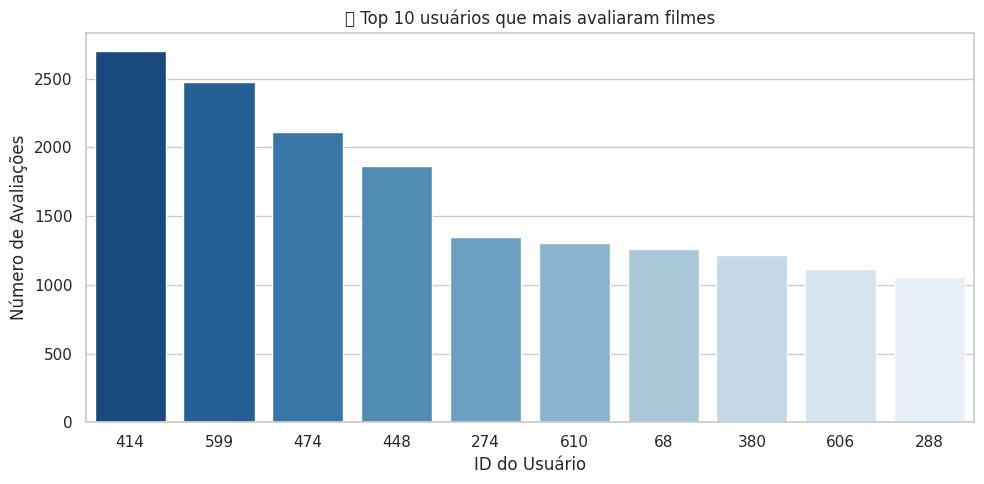

In [34]:
# Contagem de avaliações por usuário
avaliacoes_por_usuario = df['userId'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avaliacoes_por_usuario.index.astype(str), y=avaliacoes_por_usuario.values, palette="Blues_r")
plt.title('🔝 Top 10 usuários que mais avaliaram filmes')
plt.xlabel('ID do Usuário')
plt.ylabel('Número de Avaliações')
plt.tight_layout()
plt.show()

In [35]:
media_usuario = df['userId'].value_counts().mean()
media_filme = df['movieId'].value_counts().mean()

print(f"👤 Média de avaliações por usuário: {media_usuario:.2f}")
print(f"🎬 Média de avaliações por filme: {media_filme:.2f}")

👤 Média de avaliações por usuário: 165.30
🎬 Média de avaliações por filme: 10.37


<ipython-input-36-397a854b451f>:12: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


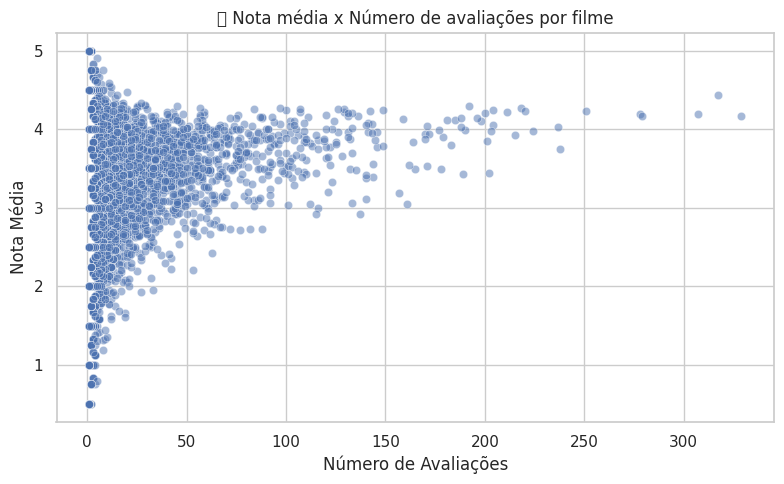

In [36]:
# Criar DataFrame com número de avaliações e nota média por filme
popularidade_qualidade = df.groupby('title').agg({
    'rating': ['count', 'mean']
}).reset_index()
popularidade_qualidade.columns = ['title', 'num_avaliacoes', 'media_nota']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=popularidade_qualidade, x='num_avaliacoes', y='media_nota', alpha=0.5)
plt.title('🎯 Nota média x Número de avaliações por filme')
plt.xlabel('Número de Avaliações')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

<ipython-input-39-62f9a8fd3190>:8: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


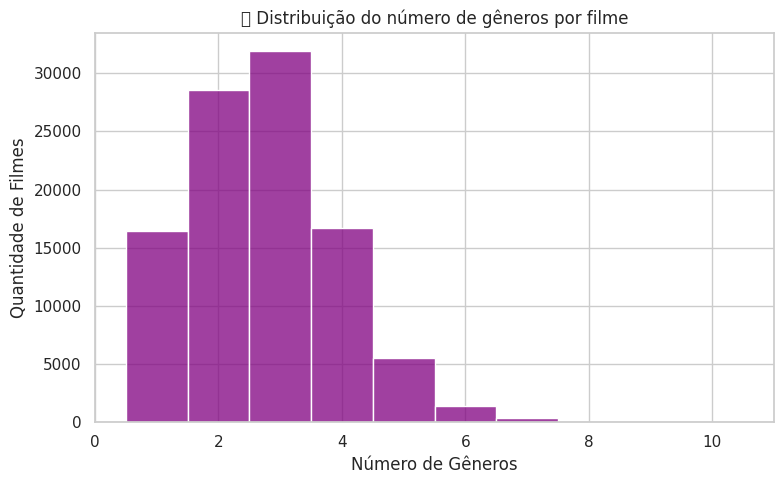

In [39]:
# Contar quantos gêneros por filme
df['num_generos'] = df['genres'].apply(lambda x: len(x.split('|')))
plt.figure(figsize=(8, 5))
sns.histplot(df['num_generos'], bins=range(1, 7), discrete=True, color='purple')
plt.title('🎭 Distribuição do número de gêneros por filme')
plt.xlabel('Número de Gêneros')
plt.ylabel('Quantidade de Filmes')
plt.tight_layout()
plt.show()

KNN


In [40]:
# 4️⃣ Matriz Usuário × Filme
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix_filled = user_movie_matrix.fillna(0)

In [41]:
# 5️⃣ Modelo KNN baseado em usuários
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_movie_matrix_filled)

NearestNeighbors(algorithm='brute', metric='cosine')

In [42]:
def recomendar_filmes(user_id, n_vizinhos=5, n_recomendacoes=10):
    vetor_usuario = user_movie_matrix_filled.loc[user_id].values.reshape(1, -1)
    distancias, indices = knn_model.kneighbors(vetor_usuario, n_neighbors=n_vizinhos + 1)
    vizinhos_ids = user_movie_matrix_filled.index[indices.flatten()[1:]]

    filmes_vistos = user_movie_matrix.loc[user_id].dropna().index
    sugestoes = {}
    for vizinho_id in vizinhos_ids:
        filmes_vizinho = user_movie_matrix.loc[vizinho_id]
        for filme_id, nota in filmes_vizinho.dropna().items():
            if filme_id not in filmes_vistos:
                sugestoes.setdefault(filme_id, []).append(nota)

    medias = {filme: np.mean(notas) for filme, notas in sugestoes.items()}
    filmes_top = sorted(medias.items(), key=lambda x: x[1], reverse=True)[:n_recomendacoes]
    resultado = [(movies[movies.movieId == filme_id]['title'].values[0], round(nota, 2))
                 for filme_id, nota in filmes_top]
    return resultado

In [43]:
# 7. Exemplo de uso
# =====================================
recomendados = recomendar_filmes(user_id=2)
print("\n🎥 Filmes recomendados para o usuário :")
for titulo, nota in recomendados:
    print(f"{titulo} (nota média: {nota})")


🎥 Filmes recomendados para o usuário :
Seven (a.k.a. Se7en) (1995) (nota média: 5.0)
Pulp Fiction (1994) (nota média: 5.0)
Trainspotting (1996) (nota média: 5.0)
Clockwork Orange, A (1971) (nota média: 5.0)
Godfather: Part II, The (1974) (nota média: 5.0)
Shining, The (1980) (nota média: 5.0)
Eyes Wide Shut (1999) (nota média: 5.0)
Shrek (2001) (nota média: 5.0)
Donnie Darko (2001) (nota média: 5.0)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001) (nota média: 5.0)
